# Image Compression using Singular Value Decomposition (SVD)

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.image import imread
from  numpy.linalg import matrix_rank as rank

## &#9997; Configuration

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

## &#9881; Functions

In [3]:
def image_show(X, title):
    img = plt.imshow(X)
    img.set_cmap('gray')
    plt.axis("off")
    plt.title(title)
    plt.show()  

In [4]:
def rbg_gray(filename):
    A = imread(filename)
    return np.mean(A, -1)

In [5]:
def compute_slice(U, S, VT, r):
    Xapprox = U[:,:r]@S[:r,:r]@VT[:r,:]
    return Xapprox

In [6]:
def axes_display(axes, row_idx, cols_idx, img, image_rank):
    axes[row_idx, cols_idx].imshow(img, cmap='gray')
    axes[row_idx, cols_idx].set_title(f'Rank r={image_rank}', fontweight ="bold")
    axes[row_idx, cols_idx].axis('off')

### &#129504; SVD

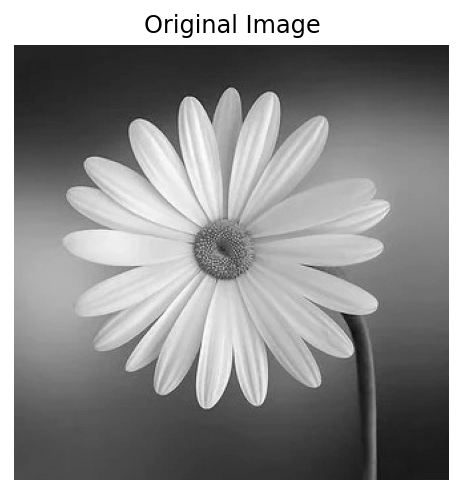

In [7]:
img = rbg_gray("flower.jpg")

image_show(img, title = "Original Image")

In [8]:
U,S, VT = np.linalg.svd(img)
S = np.diag(S)

In [9]:
ranks = [rank(img), 100, 50, 25, 5, 1]

In [10]:
number_of_rows = 2
number_of_cols = 3

In [ ]:
# Displaying Images corresponding to different Ranks

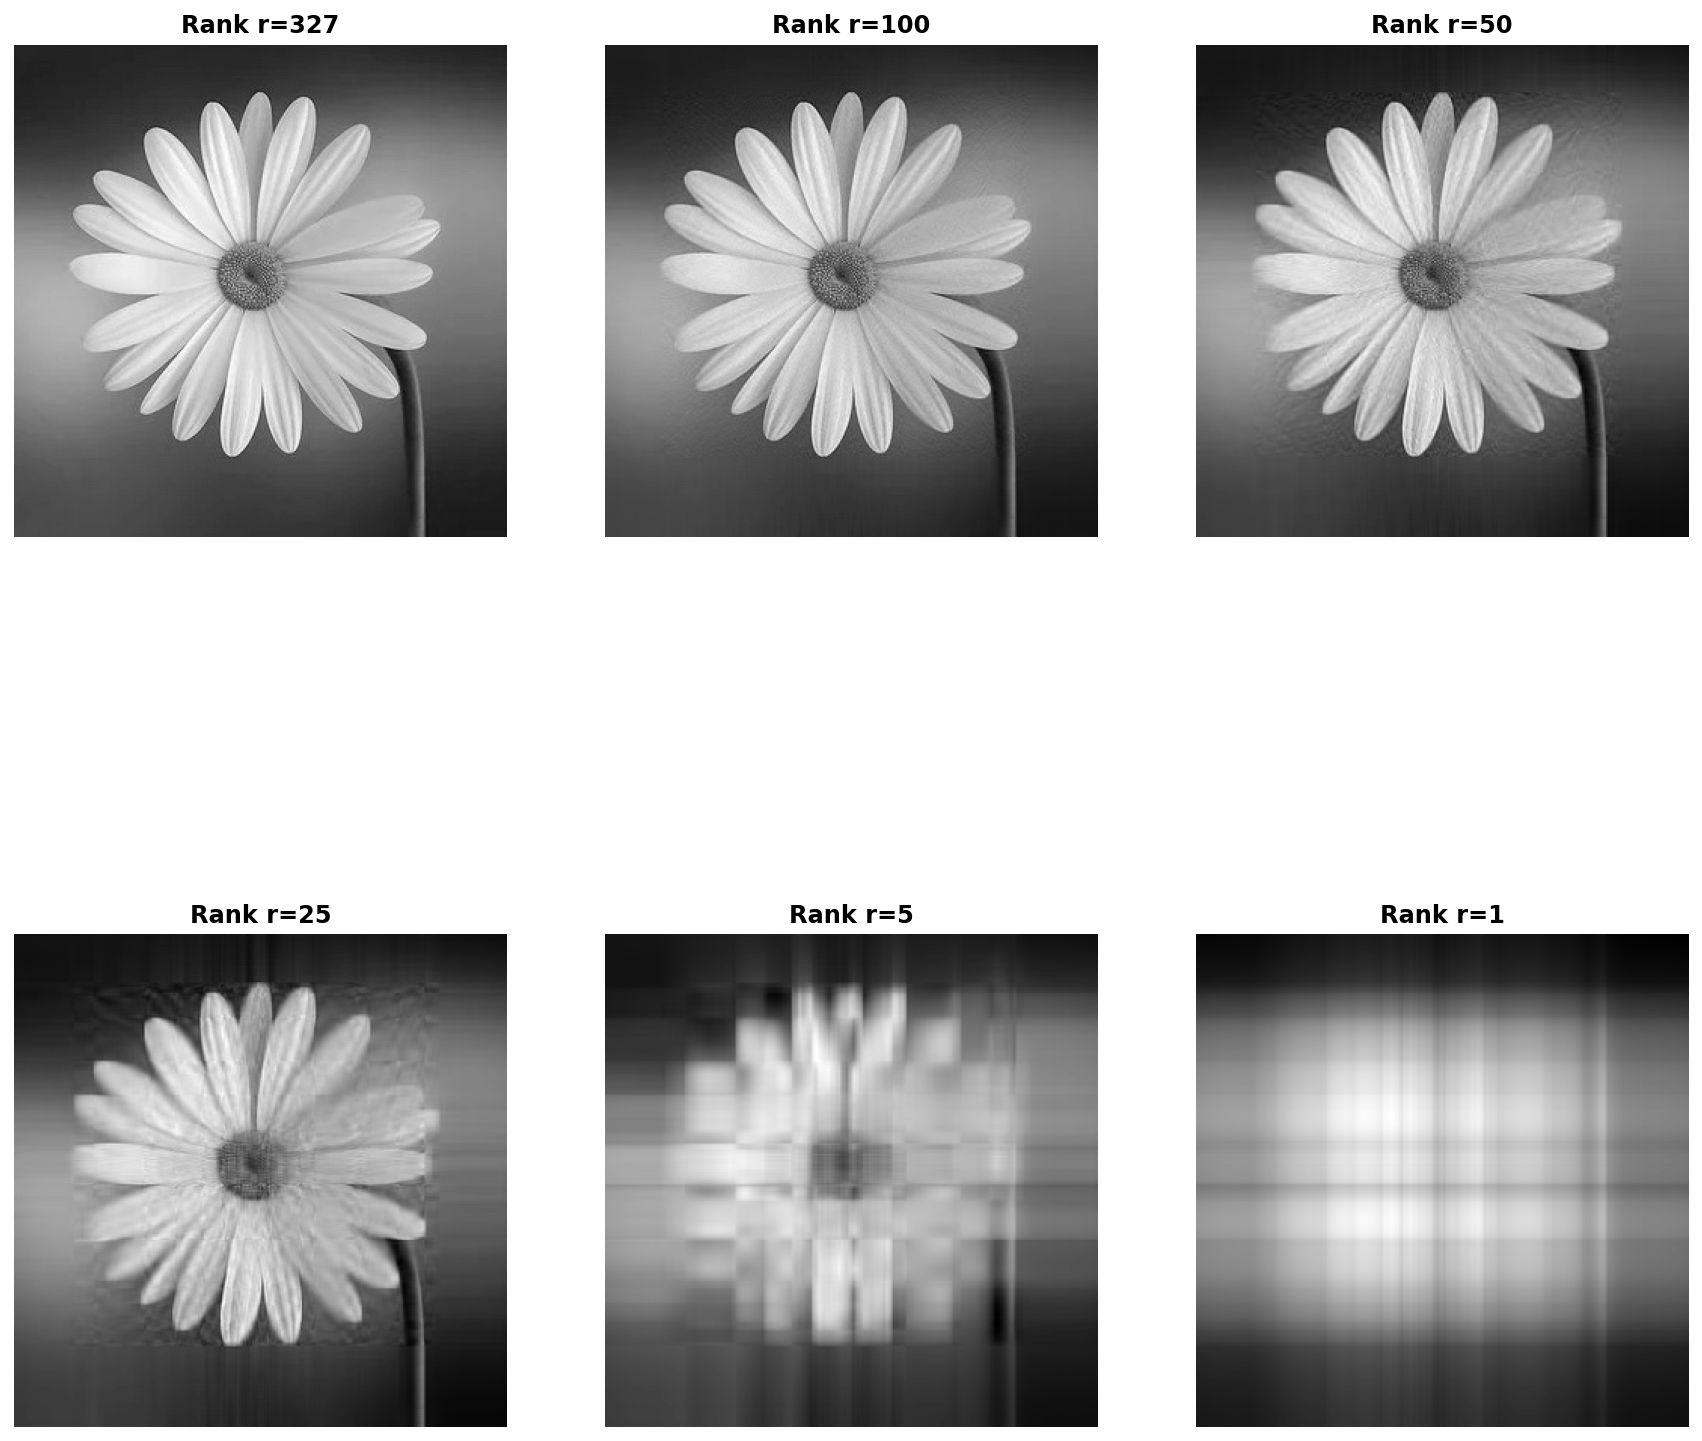

In [11]:
# define a grid of number_of_rows x number_of_cols
fig, axes = plt.subplots(nrows=number_of_rows, ncols=number_of_cols, figsize=(15,15))

# counter to access the desired rank value from the ranks list
r_cnt = 0

for i in range(number_of_rows):
    for j in range(number_of_cols):
        image_slice = compute_slice(U=U, S=S, VT=VT, r=ranks[r_cnt])
        axes_display(axes=axes, row_idx=i, cols_idx=j, img=image_slice, image_rank=ranks[r_cnt])
        r_cnt += 1

plt.show()